In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/Users/hannesyilmaz/Desktop/Portofolio/Text-Classification/Book1.csv"

In [3]:
print(data_path)

/Users/hannesyilmaz/Desktop/Portofolio/Text-Classification/Book1.csv


In [4]:
data_raw = pd.read_csv(data_path)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 2033
Number of columns in data = 12


**Sample data:**


,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
0,1,Åtalad advokat frias från stämpling till mord,0,0,0,0,0,0,1,0,0,0
1,2,”The office” 20 år – så sprängde Ricky Gervais...,0,0,0,0,0,1,0,0,0,0
2,3,Fusk med folkbokföringen ska stoppas,0,0,0,0,0,0,1,0,0,0
3,4,Niklas Orrenius: För mig ligger det svenska hj...,0,0,0,0,0,1,0,0,0,0
4,5,Fängslande surrealistisk film på Mjellby konst...,0,0,0,0,0,1,0,0,0,0


In [6]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of articles = ",len(data_raw))
print("Number of clean articles = ",clean_comments_count)
print("Number of articles with labels =",(len(data_raw)-clean_comments_count))

Total number of articles =  2033
Number of clean articles =  9
Number of articles with labels = 2024


In [7]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Id                    0
Heading               0
Politik               0
Utbildning            0
Religion              0
Miljo                 0
Ekonomi               0
LivsstilFritt         0
SamhalleKonflikter    0
Halsa                 0
Idrott                0
VetenskapTeknik       0
dtype: int64


In [8]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['Politik', 'Utbildning', 'Religion', 'Miljo', 'Ekonomi', 'LivsstilFritt', 'SamhalleKonflikter', 'Halsa', 'Idrott', 'VetenskapTeknik']


In [9]:
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,Politik,451
1,Utbildning,61
2,Religion,15
3,Miljo,118
4,Ekonomi,545
5,LivsstilFritt,248
6,SamhalleKonflikter,698
7,Halsa,241
8,Idrott,151
9,VetenskapTeknik,99


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


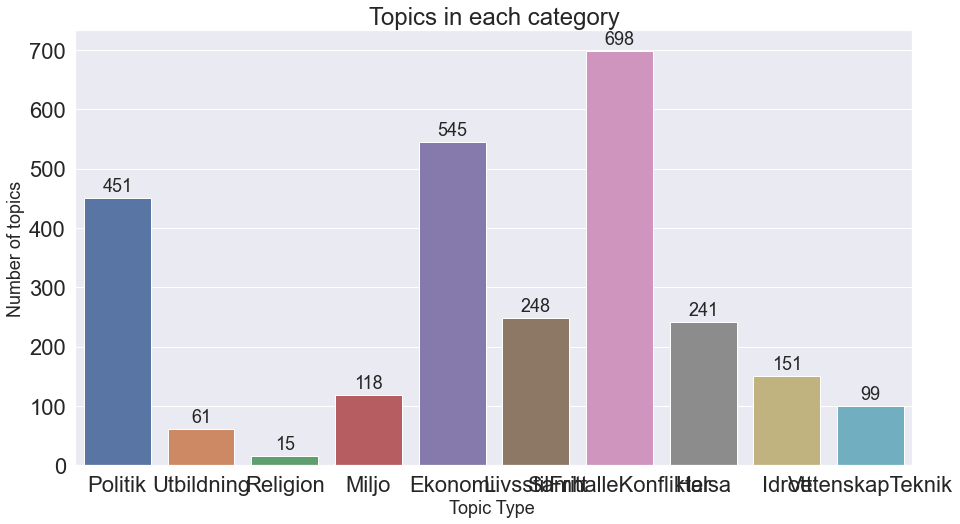

In [10]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Topics in each category", fontsize=24)
plt.ylabel('Number of topics', fontsize=18)
plt.xlabel('Topic Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


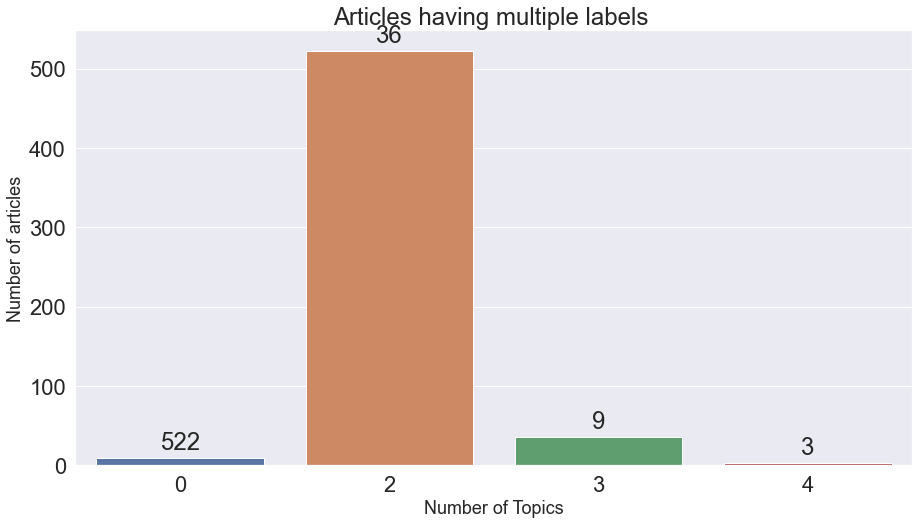

In [11]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Articles having multiple labels ")
plt.ylabel('Number of articles', fontsize=18)
plt.xlabel('Number of Topics', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

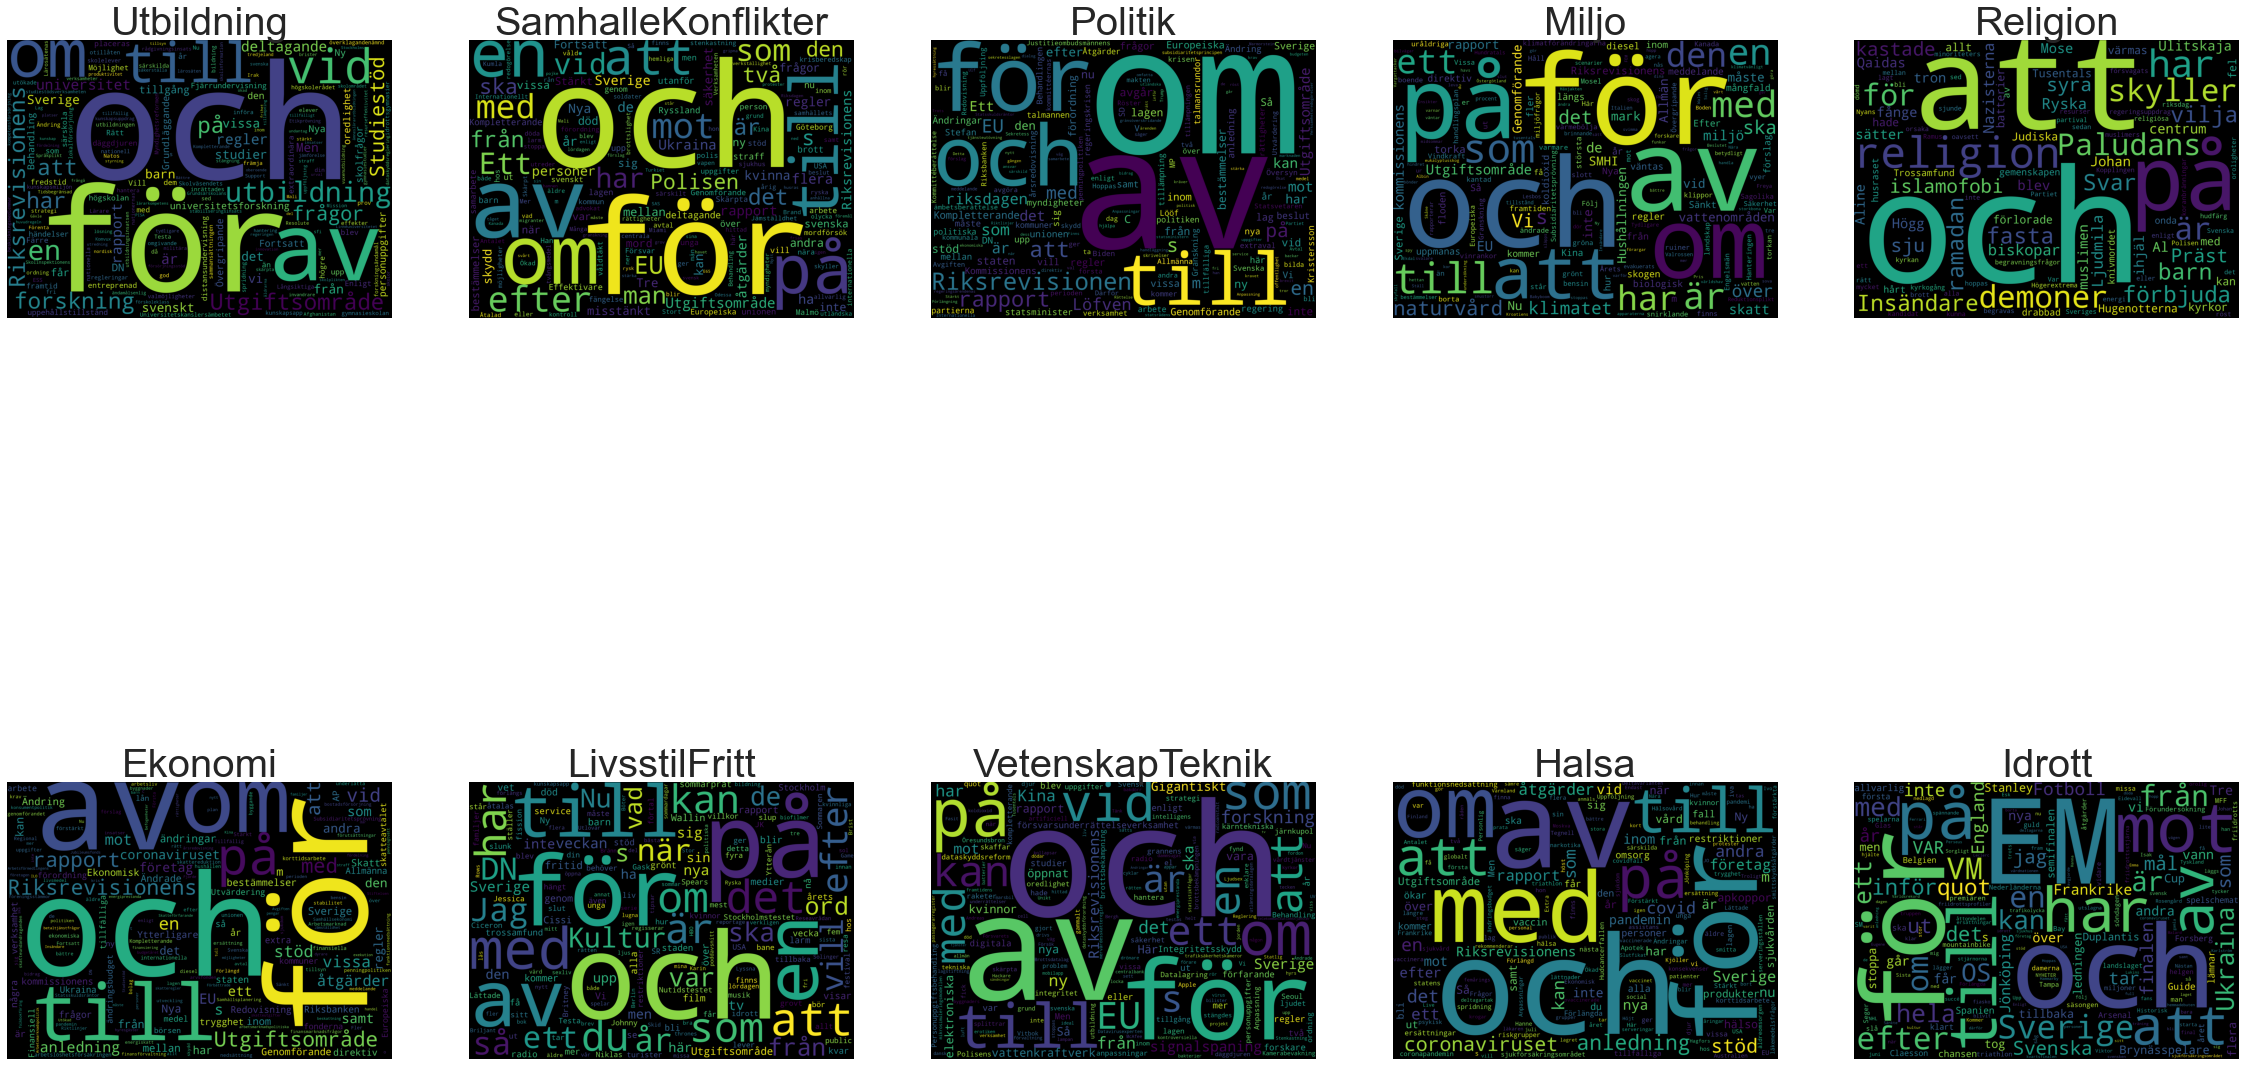

In [12]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Utbildning
subset = data_raw[data_raw.Utbildning==1]
text = subset.Heading.values
cloud_Utbildning = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 1)
plt.axis('off')
plt.title("Utbildning",fontsize=40)
plt.imshow(cloud_Utbildning)


# SamhalleKonflikter
subset = data_raw[data_raw.SamhalleKonflikter==1]
text = subset.Heading.values
cloud_SamhalleKonflikter = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 2)
plt.axis('off')
plt.title("SamhalleKonflikter",fontsize=40)
plt.imshow(cloud_SamhalleKonflikter)


# Politik
subset = data_raw[data_raw.Politik==1]
text = subset.Heading.values
cloud_Politik = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 3)
plt.axis('off')
plt.title("Politik",fontsize=40)
plt.imshow(cloud_Politik)


# Miljo
subset = data_raw[data_raw.Miljo==1]
text = subset.Heading.values
cloud_Miljo = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 4)
plt.axis('off')
plt.title("Miljo",fontsize=40)
plt.imshow(cloud_Miljo)


# Religion
subset = data_raw[data_raw.Religion==1]
text = subset.Heading.values
cloud_Religion = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 5)
plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud_Religion)


# Ekonomi
subset = data_raw[data_raw.Ekonomi==1]
text = subset.Heading.values
cloud_Ekonomi = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 6)
plt.axis('off')
plt.title("Ekonomi",fontsize=40)
plt.imshow(cloud_Ekonomi)

# LivsstilFritt
subset = data_raw[data_raw.LivsstilFritt==1]
text = subset.Heading.values
cloud_LivsstilFritt = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 7)
plt.axis('off')
plt.title("LivsstilFritt",fontsize=40)
plt.imshow(cloud_LivsstilFritt)

# VetenskapTeknik
subset = data_raw[data_raw.VetenskapTeknik==1]
text = subset.Heading.values
cloud_VetenskapTeknik = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 8)
plt.axis('off')
plt.title("VetenskapTeknik",fontsize=40)
plt.imshow(cloud_VetenskapTeknik)

# Halsa
subset = data_raw[data_raw.Halsa==1]
text = subset.Heading.values
cloud_Halsa = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 9)
plt.axis('off')
plt.title("Halsa",fontsize=40)
plt.imshow(cloud_Halsa)


# Idrott
subset = data_raw[data_raw.Idrott==1]
text = subset.Heading.values
cloud_Idrott = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 5, 10)
plt.axis('off')
plt.title("Idrott",fontsize=40)
plt.imshow(cloud_Idrott)


plt.show()

In [13]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=len(data_raw))]
data.shape

(2033, 12)

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [15]:

def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z wåäöÅÄÖ]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


In [16]:
data['Heading'] = data['Heading'].str.lower()
data['Heading'] = data['Heading'].apply(cleanHtml)
data['Heading'] = data['Heading'].apply(cleanPunc)
data['Heading'] = data['Heading'].apply(keepAlpha)
data.head()

,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
734,771,långsiktig finansiering och stärkt oberoende f...,0,0,0,0,1,1,0,0,0,0
1975,2371,dybala hyllades av fansen trendade viralt,0,0,0,0,0,0,0,0,1,0
707,737,anpassning av lagen om passagerarregister till...,1,0,0,0,0,0,0,0,0,1
1185,1404,ett ändamålsenligt minoritetsskydd i aktiebola...,0,0,0,0,1,0,0,0,0,0
772,854,moderna och rättssäkra regler för att hålla ut...,0,0,0,0,0,0,1,0,0,0


In [17]:
nltk.download('stopwords')

stop_words = set(stopwords.words('swedish'))
stop_words.update(['noll','ett','två','tre','fyra','fem','sex','sju','åtta','nio','tio','kunna','också','över','bland','förutom','hursom','än','inom'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Heading'] = data['Heading'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hannesyilmaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
734,771,långsiktig finansiering stärkt oberoende pub...,0,0,0,0,1,1,0,0,0,0
1975,2371,dybala hyllades fansen trendade viralt,0,0,0,0,0,0,0,0,1,0
707,737,anpassning lagen passagerarregister eu s da...,1,0,0,0,0,0,0,0,0,1
1185,1404,ändamålsenligt minoritetsskydd aktiebolag e...,0,0,0,0,1,0,0,0,0,0
772,854,moderna rättssäkra regler hålla utlänningar...,0,0,0,0,0,0,1,0,0,0


In [18]:
stemmer = SnowballStemmer("swedish")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Heading'] = data['Heading'].apply(stemming)
data.head()

,Id,Heading,Politik,Utbildning,Religion,Miljo,Ekonomi,LivsstilFritt,SamhalleKonflikter,Halsa,Idrott,VetenskapTeknik
734,771,långsikt finansiering stärk oberoend public se...,0,0,0,0,1,1,0,0,0,0
1975,2371,dybal hyll fans trend viralt,0,0,0,0,0,0,0,0,1,0
707,737,anpassning lag passagerarregist eu s dataskydd...,1,0,0,0,0,0,0,0,0,1
1185,1404,ändamålsen minoritetsskyd aktiebolag ekonomisk...,0,0,0,0,1,0,0,0,0,0
772,854,mod rättssäkr regl håll utlänning förv,0,0,0,0,0,0,1,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1423, 12)
(610, 12)


In [20]:
train_text = train['Heading']
test_text = test['Heading']

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [22]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Id','Heading'], axis=1)


x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Id','Heading'], axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB

In [24]:

# DecisionTreeRegressor has heigher accuracy atm
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(DecisionTreeRegressor())),
            ])


'''
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

'''

for category in categories:
    print('**Processing {} articles...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Predicted as {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Politik articles...**
Predicted as 0.9081967213114754


**Processing Utbildning articles...**
Predicted as 0.980327868852459


**Processing Religion articles...**
Predicted as 0.9950819672131147


**Processing Miljo articles...**
Predicted as 0.9885245901639345


**Processing Ekonomi articles...**
Predicted as 0.8524590163934426


**Processing LivsstilFritt articles...**
Predicted as 0.9475409836065574


**Processing SamhalleKonflikter articles...**
Predicted as 0.8819672131147541


**Processing Halsa articles...**
Predicted as 0.9590163934426229


**Processing Idrott articles...**
Predicted as 0.9737704918032787


**Processing VetenskapTeknik articles...**
Predicted as 0.9852459016393442


